In [1]:
import os,sys
WORKSPACE_DIR = '../..' 
PROJECT_DIR = f'{WORKSPACE_DIR}/barchartapi' 
WORKING_DIR = f'{PROJECT_DIR}/barchartapi' 
if WORKING_DIR not in sys.path:
    sys.path.append(WORKING_DIR)
if PROJECT_DIR not in sys.path:
    sys.path.append(PROJECT_DIR)
if WORKSPACE_DIR not in sys.path:
    sys.path.append(WORKSPACE_DIR)    
import barchart_api as bcapi
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib import gridspec
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
init_notebook_mode(connected=True)

import datetime
import pandas as pd
import plot_utilities as pu
import datetime
import numpy as np



Barchart OnDemand Client: https://marketdata.websol.barchart.com/
Barchart OnDemand Client: https://marketdata.websol.barchart.com/


In [2]:
import importlib
importlib.reload(pu)

Barchart OnDemand Client: https://marketdata.websol.barchart.com/
Barchart OnDemand Client: https://marketdata.websol.barchart.com/


<module 'plot_utilities' from '/Users/bperlman1/Documents/billybyte/pyliverisk/barchartapi/barchartapi/plot_utilities.py'>

In [4]:
# set this to 'free' or 'paid'
endpoint = 'free' # free or paid

# set the bar_type and the interval
bar_type='daily' # minutes, daily, monthly
interval=1 # 1,5,15,30,60

# create an instance 
api_key = open(f'./temp_folder/{endpoint}_api_key.txt','r').read()
endpoint_type=f'{endpoint}_url'
bch = bcapi.BcHist(api_key, bar_type=bar_type, interval=interval,endpoint_type = endpoint_type)


Barchart OnDemand Client: https://marketdata.websol.barchart.com/


In [5]:
yy = str(datetime.datetime.now().year)[2:]
short_name = f'HOZ{yy}'
days_to_fetch = 120

dt_end = datetime.datetime.now()
dt_beg = dt_end - datetime.timedelta(days_to_fetch)
beg_yyyymmdd = '%04d%02d%02d' %(dt_beg.year,dt_beg.month,dt_beg.day)#20181201
end_yyyymmdd = '%04d%02d%02d' %(dt_end.year,dt_end.month,dt_end.day)#20190219

tup = bch.get_history(short_name, beg_yyyymmdd, end_yyyymmdd)
print(f'get_history: {short_name} WRITING DATA {datetime.datetime.now()}')
df_hist = tup[1]
def __full_date(d):
    year = int(str(d)[0:4])
    month = int(str(d)[5:7])
    day = int(str(d)[8:10])
    hour = int(str(d)[11:13])
    minute = int(str(d)[14:16])
    dt = datetime.datetime(year,month,day,hour,minute)
    return(dt)
    
df_hist['date'] = df_hist.timestamp.apply(__full_date)
print(f'get_history: {short_name} END {datetime.datetime.now()}')
df_hist.tail()

get_history: HOZ19 WRITING DATA 2019-06-14 07:05:21.561326
get_history: HOZ19 END 2019-06-14 07:05:21.565284


,close,high,low,open,openInterest,symbol,timestamp,tradingDay,volume,date
78,1.8634,1.8707,1.8304,1.8448,48460,HOZ19,2019-06-07T00:00:00-05:00,2019-06-07,13421,2019-06-07
79,1.8448,1.8785,1.8396,1.8785,47955,HOZ19,2019-06-10T00:00:00-05:00,2019-06-10,7187,2019-06-10
80,1.8591,1.8674,1.8454,1.8500,44753,HOZ19,2019-06-11T00:00:00-05:00,2019-06-11,17552,2019-06-11
81,1.8165,1.8466,1.8085,1.8464,43275,HOZ19,2019-06-12T00:00:00-05:00,2019-06-12,10900,2019-06-12
82,1.8446,1.8724,1.8080,1.8113,42738,HOZ19,2019-06-13T00:00:00-05:00,2019-06-13,10416,2019-06-13


___
### Create Candlestick charts for each day's 30 minute intra-day data
___

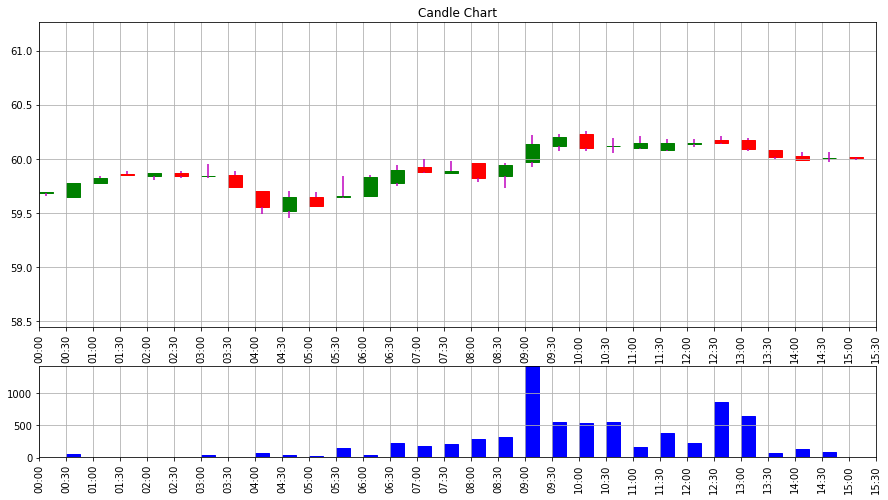

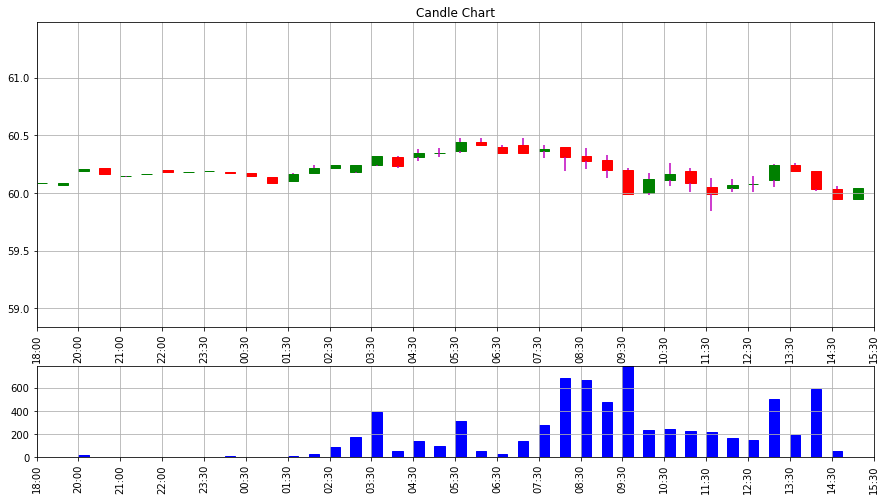

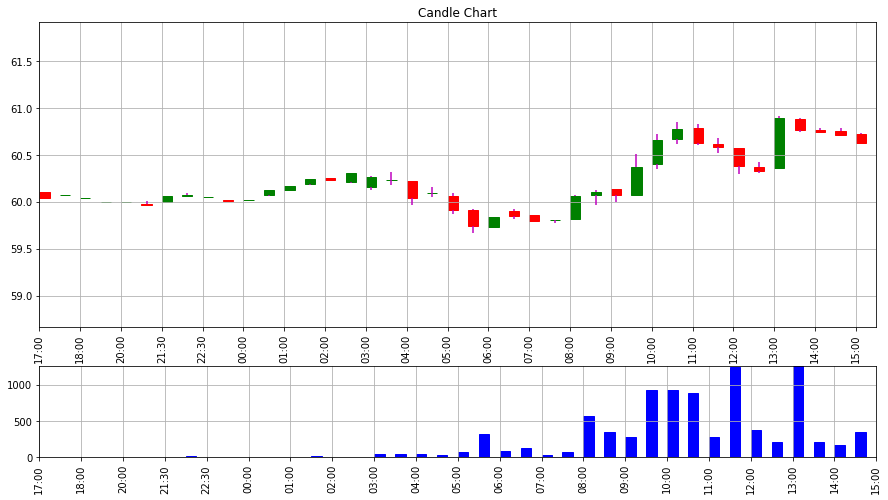

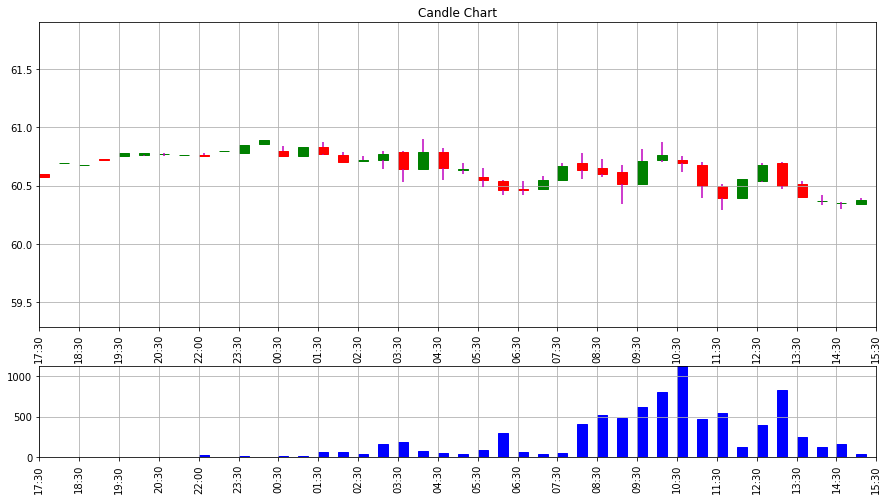

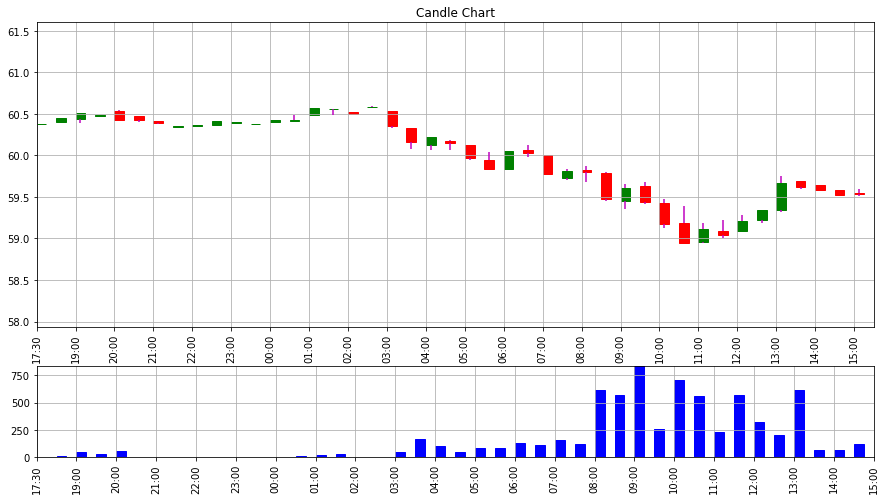

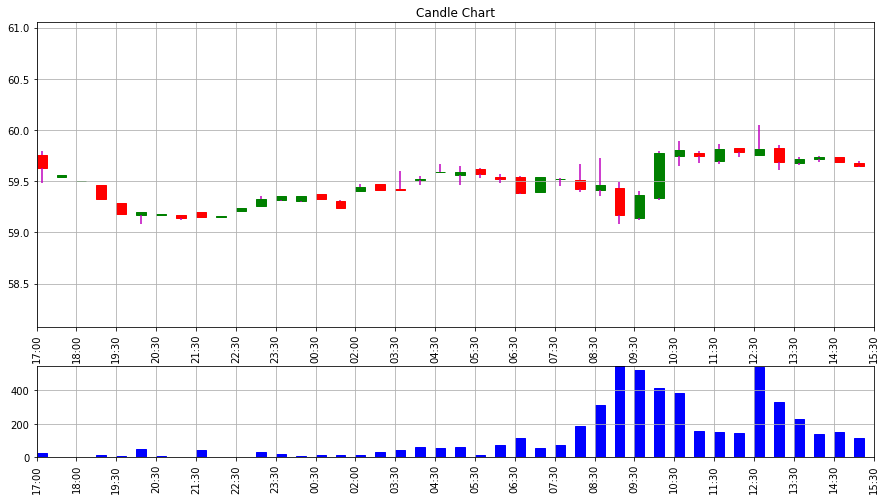

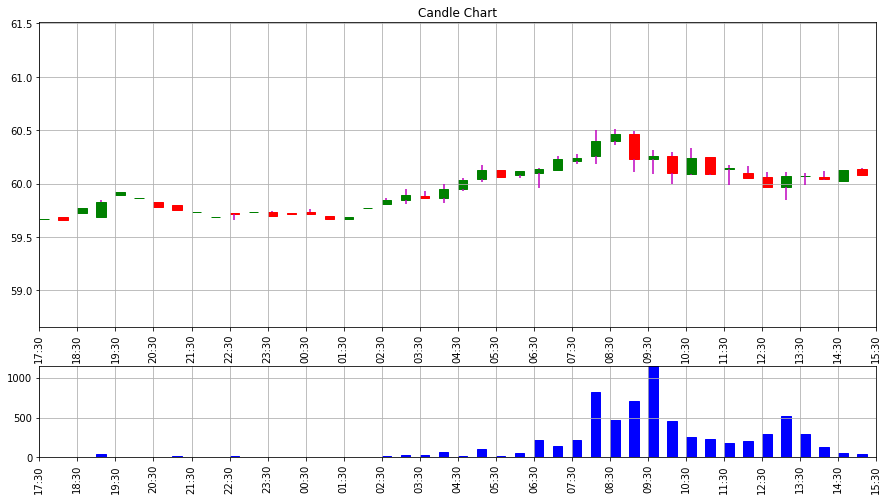

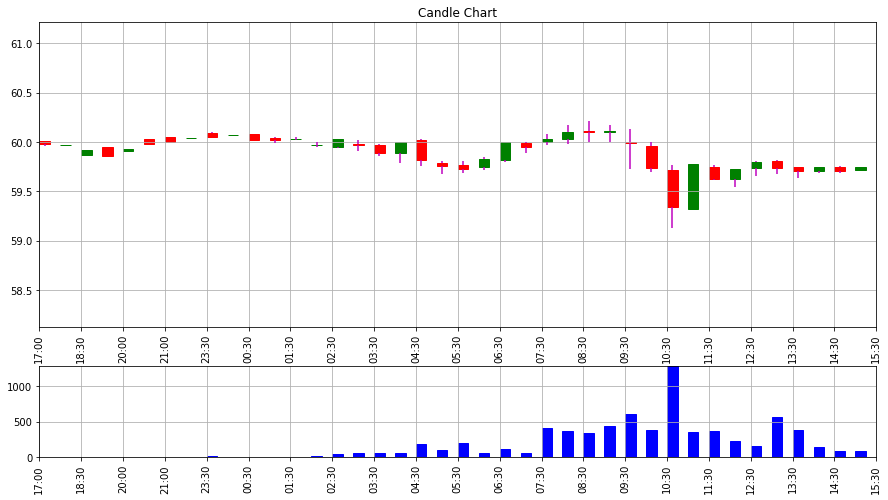

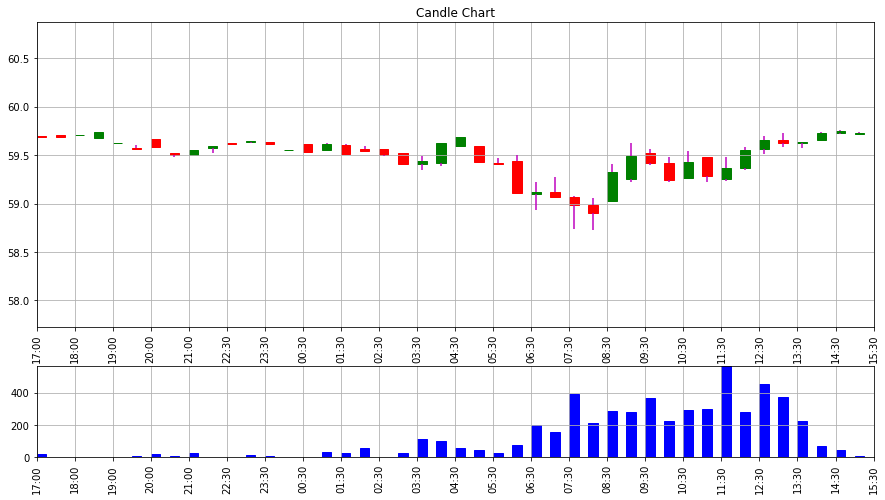

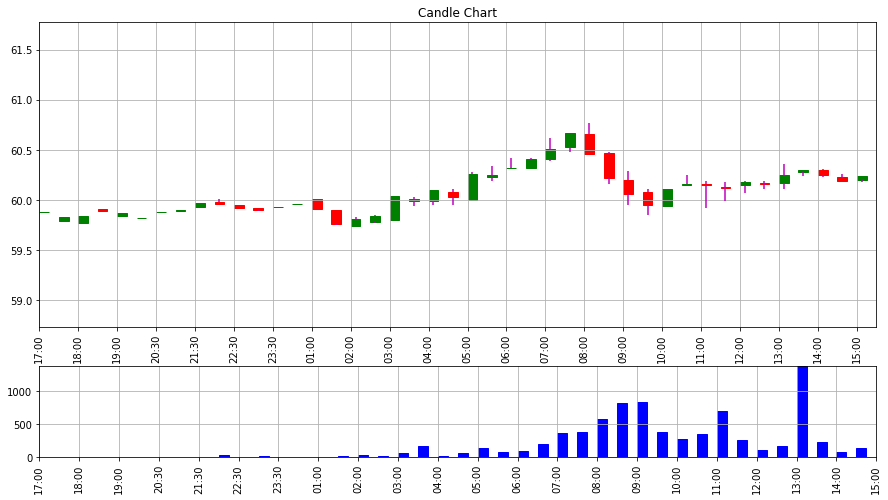

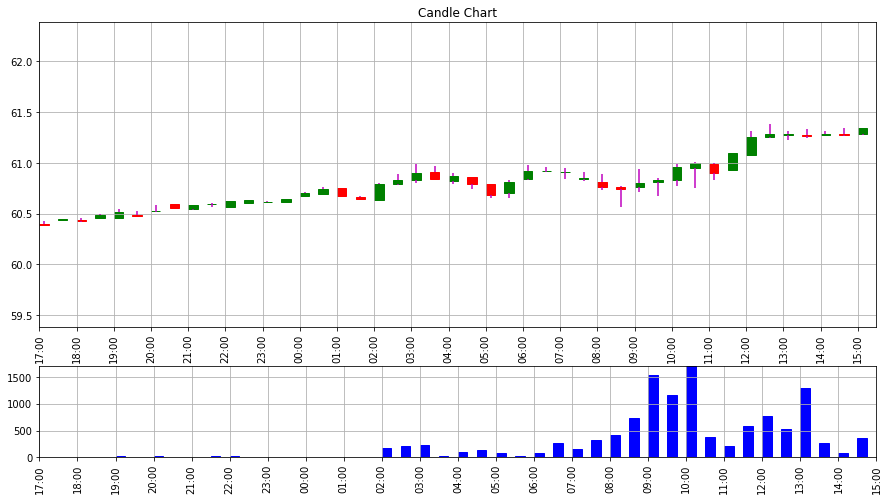

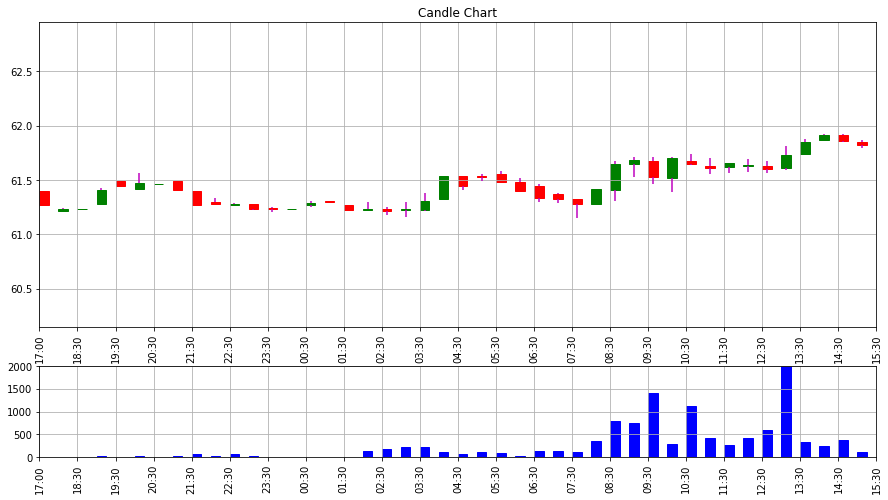

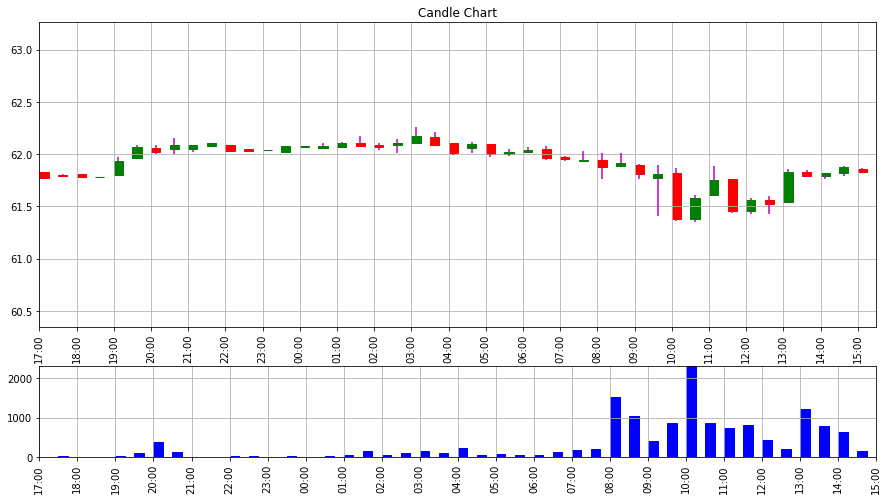

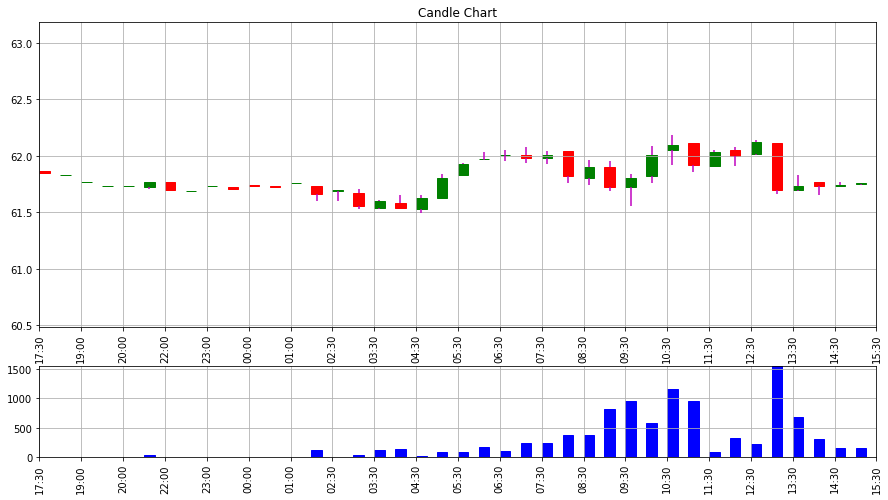

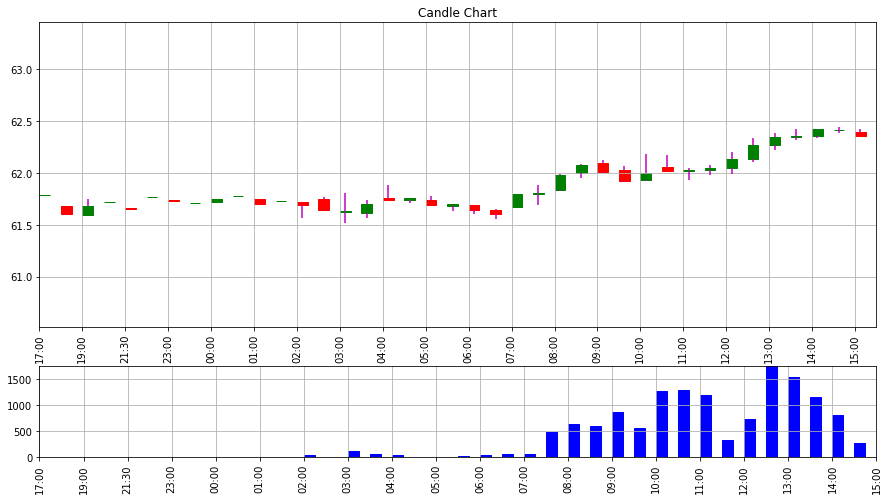

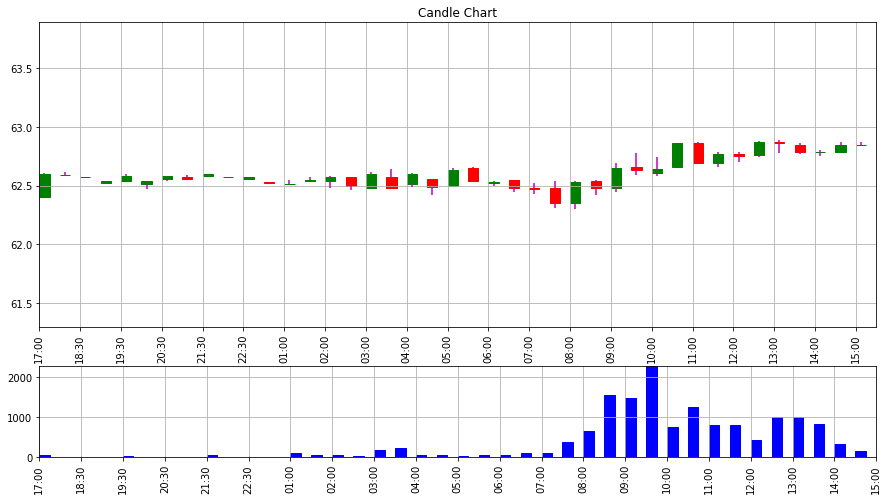

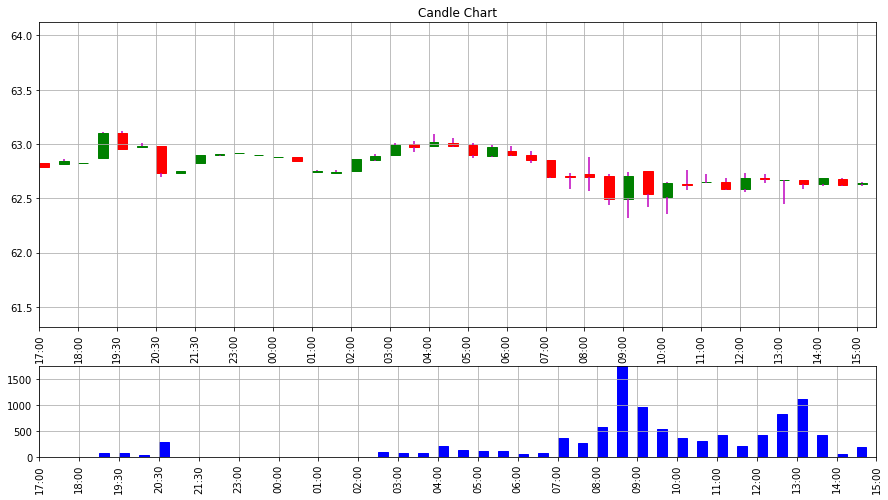

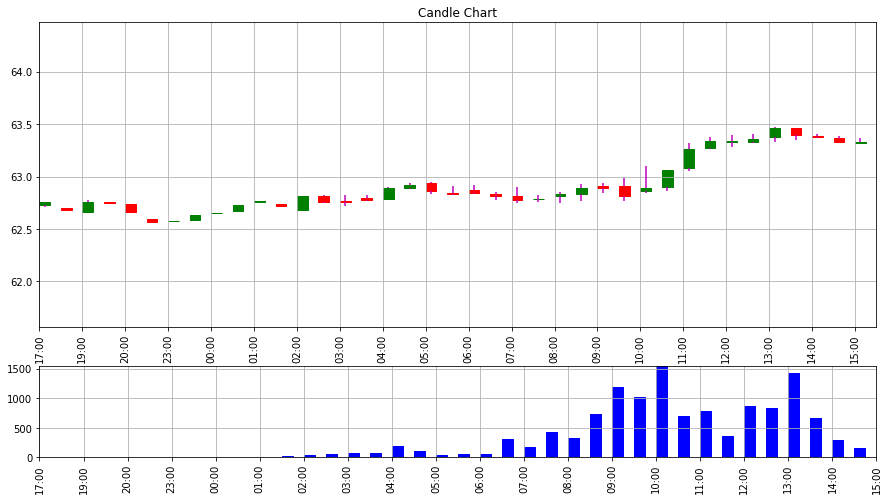

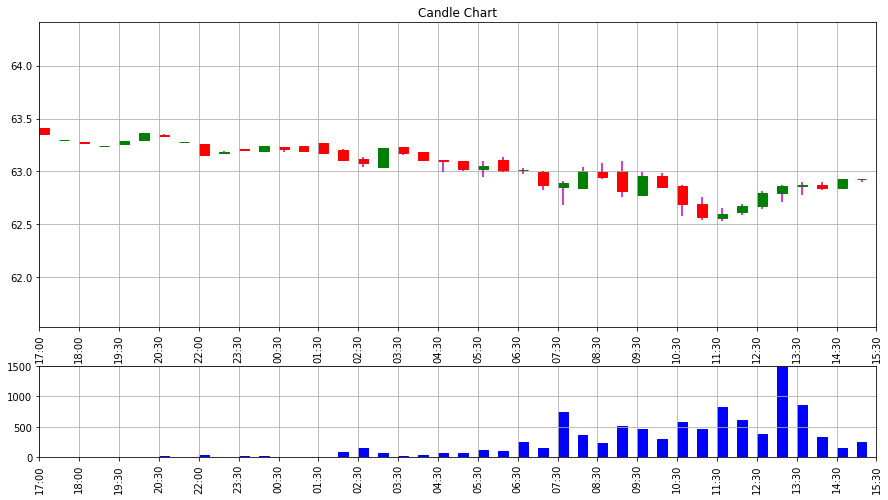

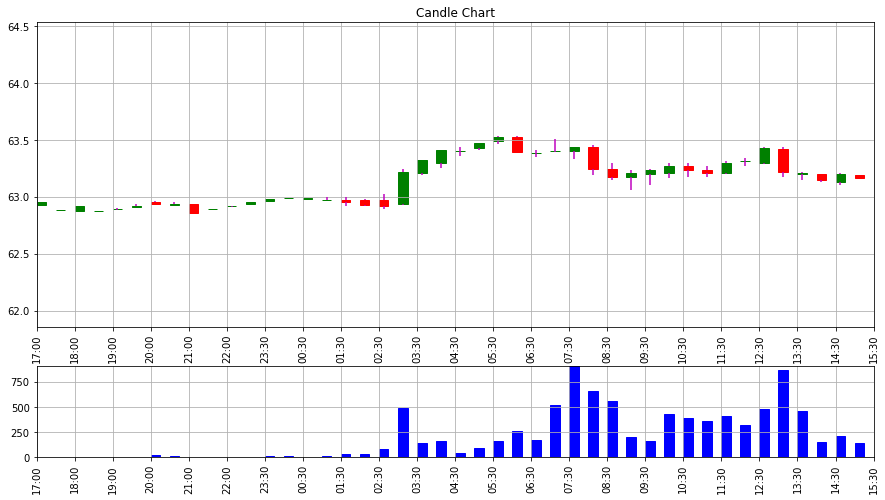

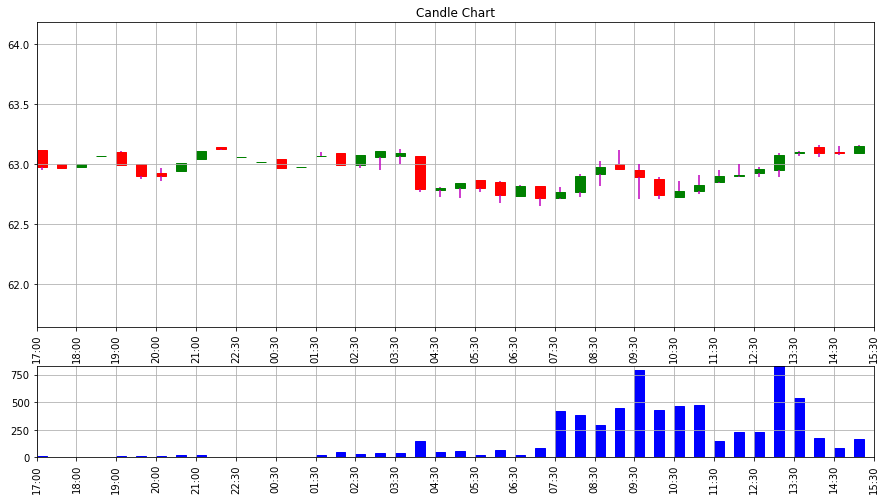

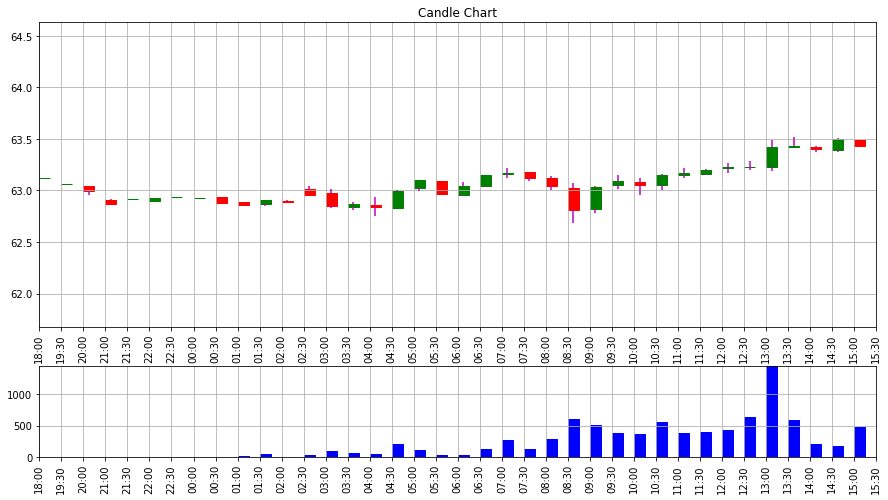

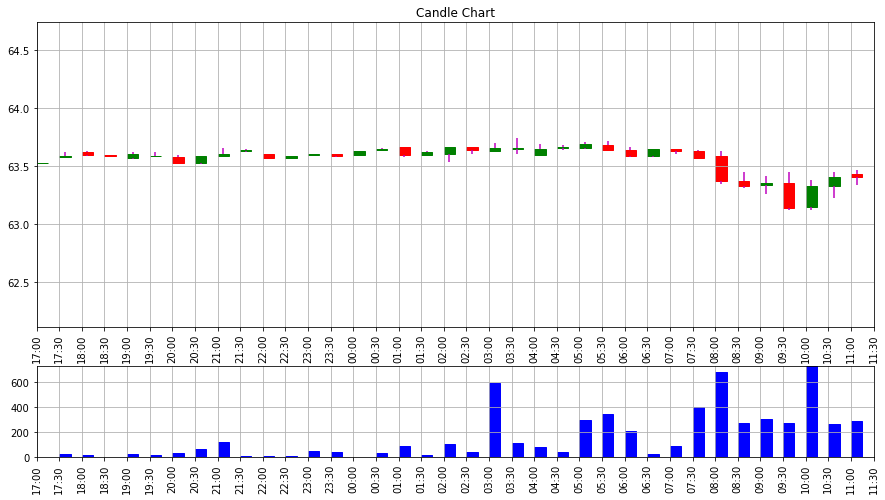

In [8]:
for day in df_hist.tradingDay.unique():
    try:
        fig,axs = pu.candles(df_hist[df_hist.tradingDay==day])
        plt.rcParams.update({'figure.max_open_warning': 0})
    except Exception as e:
        print(f'ERROR FOR DAY {day}')
        print(str(e))
        

### End